In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#iformation related to data set
df = pd.read_csv('/content/IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [62]:
df.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore,highest_Wickets
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216,3.108108
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052,0.900039
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000,1.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000,2.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000,3.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000,4.000000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000,5.000000


In [7]:
df.shape

(74, 20)

In [8]:
df.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


In [10]:
#which team won the most matches??
match_wins = df['match_winner'].value_counts()

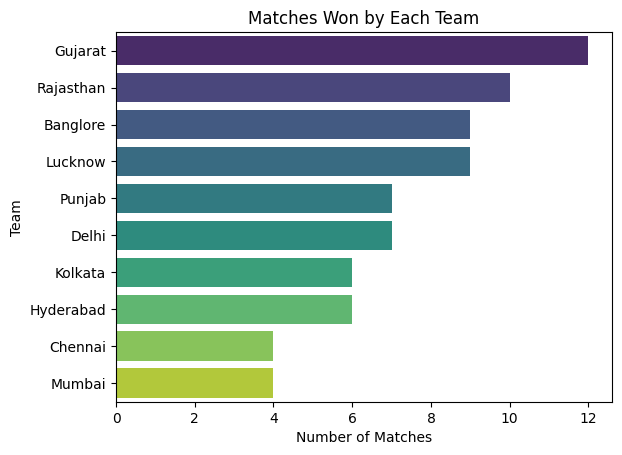

In [15]:
sns.barplot(y=match_wins.index, x=match_wins.values,palette='viridis')
plt.xlabel('Number of Matches')
plt.ylabel('Team')
plt.title('Matches Won by Each Team')
plt.show()

<Axes: xlabel='toss_decision', ylabel='count'>

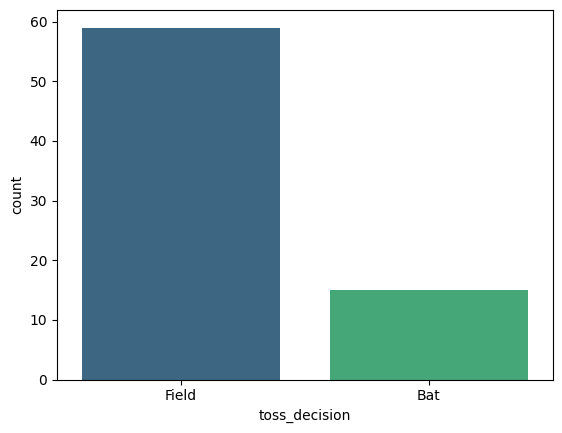

In [20]:
#toss descision trend ??
sns.countplot(x=df['toss_decision'],palette='viridis')

In [23]:
#toss winner vs match winner??
count = df[df['toss_winner'] == df['match_winner']].shape[0]
percentage = (count / df.shape[0]) * 100

In [29]:
percentage

48.64864864864865

<Axes: xlabel='won_by', ylabel='count'>

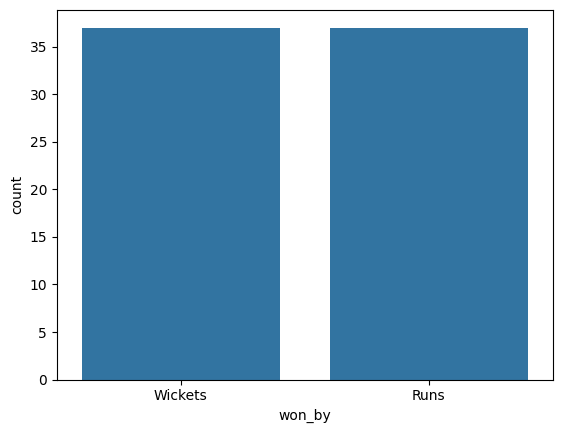

In [30]:
#how do teams win ? (Runs vs Wickets)
sns.countplot(x = df['won_by'])

In [34]:
#key player perfromance that is player of the match
count = df['player_of_the_match'].value_counts().head(10)

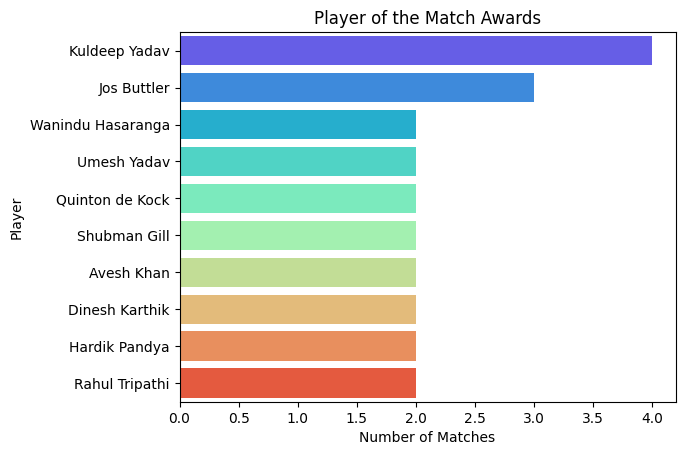

In [37]:
sns.barplot(y=count.index, x=count.values,palette='rainbow')
plt.xlabel('Number of Matches')
plt.ylabel('Player')
plt.title('Player of the Match Awards')
plt.show()

In [41]:
#2 top scorers
high = df.groupby("top_scorer")['highscore'].sum().sort_values(ascending=False).head(2)
high

,highscore
top_scorer,
Jos Buttler,651
Quinton de Kock,377


<Axes: ylabel='top_scorer'>

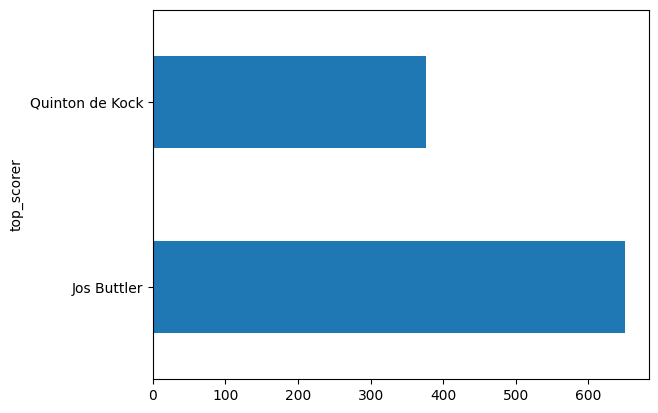

In [44]:
high.plot(kind = 'barh')

In [46]:
#10 best bowling figure
df['highest_Wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_Wickets'] = df['highest_Wickets'].astype(int)
best = df.groupby("best_bowling")['highest_Wickets'].sum().sort_values(ascending=False).head(10)
best

,highest_Wickets
best_bowling,
Yuzvendra Chahal,17
Jasprit Bumrah,11
Kuldeep Yadav,11
Rashid Khan,11
Josh Hazlewood,10
Kagiso Rabada,10
Avesh Khan,10
Umran Malik,9
Wanindu Hasaranga,9


<Axes: ylabel='best_bowling'>

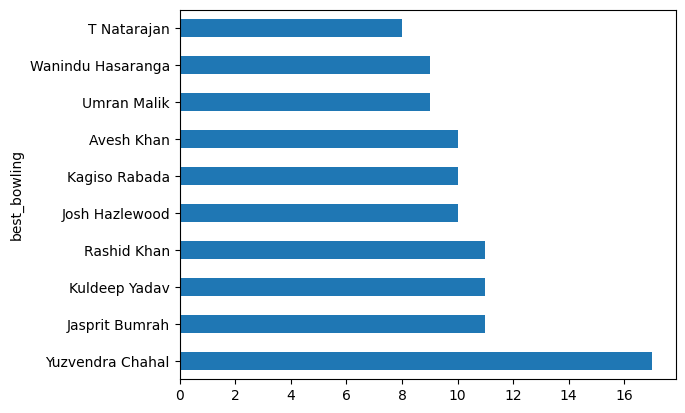

In [47]:
best.plot(kind = 'barh')

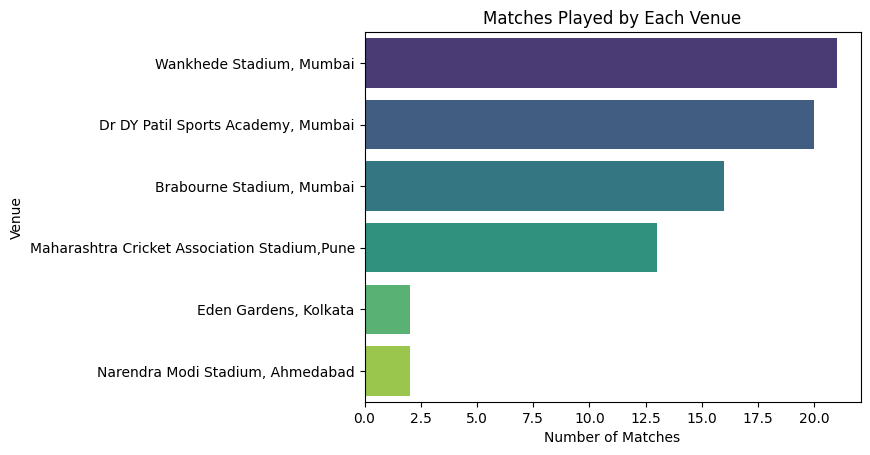

In [49]:
#venue analysis
#most match played by venue
venue = df['venue'].value_counts().head(10)
venue
sns.barplot(y=venue.index, x=venue.values,palette='viridis')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.title('Matches Played by Each Venue')
plt.show()

In [51]:
#who won the highest margin by runs??
df[df['won_by'] == 'Runs'].sort_values(by='margin', ascending=False).head(1)[['match_winner', 'margin']]

,match_winner,margin
54,Chennai,91


In [54]:
#which playes has the highest individual score?
df[df['highscore'] == df['highscore'].max()][['player_of_the_match']]

,player_of_the_match
65,Quinton de Kock


In [59]:
#which players has the least individual score?
df[df['highscore'] == df['highscore'].min()][['player_of_the_match']]

,player_of_the_match
5,Wanindu Hasaranga


In [58]:
#which bowler has the best bowling figures?
df[df['highest_Wickets'] == df['highest_Wickets'].max()][['best_bowling']]

,best_bowling
29,Yuzvendra Chahal
39,Umran Malik
53,Wanindu Hasaranga
55,Jasprit Bumrah


In [60]:
#which bowlers has the least bowling figure?
df[df['highest_Wickets'] == df['highest_Wickets'].min()][['best_bowling']]

,best_bowling
70,Hardik Pandya


In [67]:
#what is the most successfull venue based on the home team?
home_wins = df[df['team1'] == df['match_winner']].groupby('venue').size().sort_values(ascending=False).head(1)
home_wins

,0
venue,
"Dr DY Patil Sports Academy, Mumbai",11


In [73]:
# Win rates - Batting First vs Fielding First
df['bat_first'] = df.apply(lambda x: x['team1'] if x['toss_decision'] == 'Field' else x['team2'], axis=1)
df['field_first'] = df.apply(lambda x: x['team2'] if x['toss_decision'] == 'Field' else x['team1'], axis=1)

bat_first = df[df['match_winner'] == df['bat_first']].shape[0]
field_first = df[df['match_winner'] == df['field_first']].shape[0]

bat_Win = (bat_first / (bat_first + field_first)) * 100
field_Win = (field_first / (bat_first + field_first)) * 100

bat_Win

59.45945945945946

In [74]:
field_Win

40.54054054054054

In [81]:
#Team with highest win percentage?

teams = pd.concat([df['team1'], df['team2']])
matches_played = teams.value_counts()
matches_won = df['match_winner'].value_counts()

win_percentage_df = pd.DataFrame({
    'Matches Played': matches_played,
    'Matches Won': matches_won
}).fillna(0)

win_percentage_df['Win %'] = (win_percentage_df['Matches Won'] / win_percentage_df['Matches Played']) * 100
win_percentage_df = win_percentage_df.sort_values(by='Win %', ascending=False)

<Axes: title={'center': 'Win Percentage of Each Team'}>

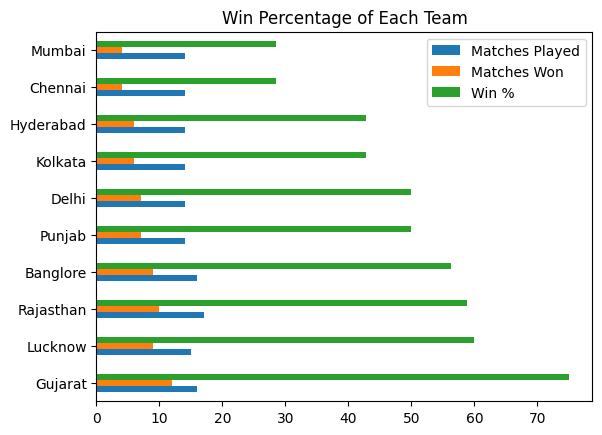

In [85]:
win_percentage_df.plot(kind = 'barh',title = 'Win Percentage of Each Team')
